# Example 1. Authorizing an application to access Twitter account data

In [1]:
import twitter
# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'OYT3v8MByXqfVjdU49B64gQLB'
CONSUMER_SECRET ='QGFz5aa4CRXyVOWxgZQd2YxjcB5FjmK8y6QQkO39RdNbzOUJtG'
OAUTH_TOKEN = '571213367-016n5aGlN9TUNZ1dHvLBy55yKfM2PMFhSUmlE0Hf'
OAUTH_TOKEN_SECRET = '6gsjjbMrkGuJI9vvTXLcD2hhpmy2e1Cin0rmCpwJF81y6'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

# Example 2. Retrieving trends

In [20]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

for i in range(3):
    print(world_trends[0]['trends'][i]['query'])

%23GOTs7
%23PrayForJakarta
Ajax


In [21]:
for i in range(3):
    print(us_trends[0]['trends'][i]['query'])

%23WednesdayWisdom
%23GameofThrones
%23Questions4Betsy


# Example 3. Displaying API responses as pretty-printed JSON

In [4]:
import json

#print(json.dumps(world_trends, indent=1))
print(json.dumps(us_trends, indent=1))

[
 {
  "locations": [
   {
    "woeid": 23424977,
    "name": "United States"
   }
  ],
  "trends": [
   {
    "promoted_content": null,
    "tweet_volume": 99533,
    "query": "%23WednesdayWisdom",
    "url": "http://twitter.com/search?q=%23WednesdayWisdom",
    "name": "#WednesdayWisdom"
   },
   {
    "promoted_content": null,
    "tweet_volume": 79237,
    "query": "%23GameofThrones",
    "url": "http://twitter.com/search?q=%23GameofThrones",
    "name": "#GameofThrones"
   },
   {
    "promoted_content": null,
    "tweet_volume": null,
    "query": "%23Questions4Betsy",
    "url": "http://twitter.com/search?q=%23Questions4Betsy",
    "name": "#Questions4Betsy"
   },
   {
    "promoted_content": null,
    "tweet_volume": 205362,
    "query": "%22Pope+Francis%22",
    "url": "http://twitter.com/search?q=%22Pope+Francis%22",
    "name": "Pope Francis"
   },
   {
    "promoted_content": null,
    "tweet_volume": 12637,
    "query": "%23AdviceFromMovieCharacters",
    "url": "http://tw

# Example 4. Computing the intersection of two sets of trends

In [5]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'#UnwrittenBeachRules', 'Tripoli', '#IStillHaveFaithIn', '#signalconf', '#nationalbrothersday', '#PrayForJakarta', '#AdviceFromMovieCharacters', 'Far Cry 5', 'DJI Spark', 'Juan Pernalete', '#WednesdayWisdom', '#Questions4Betsy', 'Bob Dylan', 'Ajax'}


# Example 5. Collecting search results

In [8]:
#  Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.
import json

q = '#Kanye' 

count = 1000

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses, indent=4))


Length of statuses 100
Length of statuses 200
Length of statuses 200
[
    {
        "coordinates": null,
        "user": {
            "profile_banner_url": "https://pbs.twimg.com/profile_banners/379368130/1478309800",
            "favourites_count": 4553,
            "listed_count": 3,
            "url": null,
            "translator_type": "none",
            "default_profile_image": false,
            "utc_offset": -28800,
            "profile_sidebar_fill_color": "70BA61",
            "has_extended_profile": true,
            "contributors_enabled": false,
            "is_translator": false,
            "is_translation_enabled": false,
            "description": "The \"cool\" in school.....part-time croqueta enthusiast. Miami, FL. SC/IG:@guady_bynature @gearbyguady",
            "profile_background_tile": true,
            "profile_text_color": "2E2A2E",
            "statuses_count": 15942,
            "profile_image_url_https": "https://pbs.twimg.com/profile_images/84362661142566

# Example 6. Extracting text, screen names, and hashtags from tweets

In [9]:
import time


status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "the good outweighs the bad even on your worst day #kanye #onlyone https://t.co/fr38PlzajK",
 "#Kanye's attitude,#Drake's feelings.",
 "Kim Kardashian @KimKardashian  Wishes Kanye West a Happy 3-Year\u2026 https://t.co/RJVA46E1Nu #Celebrity #about #anniversary #happy #kanye",
 "Ask yourself Why did you love music in the first place and what can you do to add to the synth #hipster #kanye",
 "#lol #lmao #10at10 #iFunny #kanye #lmfao #yassss #Rugrats  https://t.co/L5IoAE2ay4"
]
[
 "KimKardashian",
 "Georgia_0102",
 "DavidKorins",
 "BCampbellkid",
 "DavidKorins"
]
[
 "kanye",
 "onlyone",
 "Kanye",
 "Drake",
 "Celebrity"
]
[
 "the",
 "good",
 "outweighs",
 "the",
 "bad"
]


# Example 7. Creating a basic frequency distribution from the words in tweets

In [10]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10

[('RT', 80), ('on', 74), ('#kanye', 70), ('we', 62), ('a', 52), ('#TMZ', 52), ('see', 52), ('#Kanye', 50), ('the', 46), ('@TMZ:', 45)]
[('TMZ', 46), ('KimKardashian', 8), ('Georgia_0102', 6), ('DavidKorins', 6), ('KanyeOfficiaI', 5), ('officialmax_w', 4), ('AnaCallejas611', 4), ('diadelakristie', 3), ('SebaballeArt', 3), ('tay_zoe01', 2)]
[('Kanye', 117), ('kanye', 78), ('TMZ', 52), ('hipster', 25), ('fashion', 13), ('celebrities', 12), ('qotd', 12), ('Kardashians', 12), ('celebrity', 12), ('KanyeWest', 9)]


# Example 8. Using prettytable to display tuples in a nice tabular format

In [11]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------+-------+
| Word   | Count |
+--------+-------+
| RT     |    80 |
| on     |    74 |
| #kanye |    70 |
| we     |    62 |
| a      |    52 |
| #TMZ   |    52 |
| see    |    52 |
| #Kanye |    50 |
| the    |    46 |
| @TMZ:  |    45 |
+--------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| TMZ            |    46 |
| KimKardashian  |     8 |
| Georgia_0102   |     6 |
| DavidKorins    |     6 |
| KanyeOfficiaI  |     5 |
| officialmax_w  |     4 |
| AnaCallejas611 |     4 |
| diadelakristie |     3 |
| SebaballeArt   |     3 |
| tay_zoe01      |     2 |
+----------------+-------+
+-------------+-------+
| Hashtag     | Count |
+-------------+-------+
| Kanye       |   117 |
| kanye       |    78 |
| TMZ         |    52 |
| hipster     |    25 |
| fashion     |    13 |
| celebrities |    12 |
| qotd        |    12 |
| Kardashians |    12 |
| celebrity   |    12 |
| KanyeWest   |     9 |
+-------------+-------+


# Example 9. Calculating lexical diversity for tweets

In [12]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3391246241229536
0.31896551724137934
0.33726067746686306
14.965


# Example 10. Finding the most popular retweets

In [13]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 310   | austin_agostino | RT @austin_agostino: To finally lay these rumors   |
|       |                 | to rest #kanye https://t.co/RaZEkYbatB             |
| 30    | TMZ             | RT @TMZ: #Kanye's got something WEIRD on his       |
|       |                 | face...and we don't see it very often! #TMZ        |
|       |                 | https://t.co/aYJ02TvbPt                            |
| 30    | TMZ             | RT @TMZ: #Kanye's got something WEIRD on his       |
|       |                 | face...and we don't see it very often! #TMZ        |
|       |                 | https://t.co/aYJ02TvbPt                            |
| 30    | TMZ             | RT @TMZ: #Kanye's got something WEIRD on his       |
|       |                 | 

#  Example 11. Plotting frequencies of words

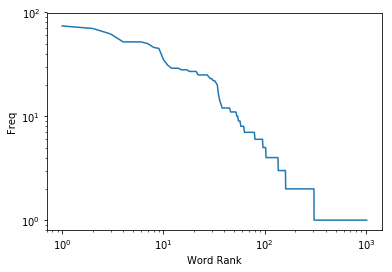

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  


word_counts = sorted(Counter(words).values(), reverse=True)



plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")